In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances,cosine_similarity


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
image_directory_clr = os.path.join('/content/drive/MyDrive/log_id_project/data/similarity/clr')
image_directory_diff = os.path.join('/content/drive/MyDrive/log_id_project/data/diff data')
image_directory_gray = os.path.join('/content/drive/MyDrive/log_id_project/data/similarity/gray')

In [16]:

def load_image(filepath, size=(300, 300)):
    img = Image.open(filepath).convert('L')
    img = img.resize(size)
    return np.array(img).flatten()

def calculate_euclidean_distance(img1, img2):
    img1 = img1.reshape(1, -1)
    img2 = img2.reshape(1, -1)
    return euclidean_distances(img1, img2)[0][0]
def calculate_cosine_similarity(img1, img2):
    img1 = img1.reshape(1, -1)
    img2 = img2.reshape(1, -1)
    return cosine_similarity(img1, img2)[0][0]


In [21]:
reference_image_name = '7b.png'
reference_image_path_gray = os.path.join(image_directory_gray, reference_image_name)
reference_image_path_clr = os.path.join(image_directory_clr, reference_image_name)
reference_image_gray = load_image(reference_image_path_gray)

In [26]:
euclidean_distances_list_gray = []
cosine_similarities_list_gray = []
euclidean_distances_list_clr = []
cosine_similarities_list_clr = []
cosine_similarities_list_dif = []

In [27]:
# gray
image_names = []
for filename in sorted(os.listdir(image_directory_gray)):
    if filename.endswith(('.JPG', '.png', '.jpg')) and filename != reference_image_name:
        image_path = os.path.join(image_directory_gray, filename)
        current_image = load_image(image_path)

        euclidean_distance = calculate_euclidean_distance(reference_image_gray, current_image)

        cosine_similarity_score = calculate_cosine_similarity(reference_image_gray, current_image)

        image_names.append(filename.split('.')[0])
        euclidean_distances_list_gray.append(euclidean_distance)

        cosine_similarities_list_gray.append(cosine_similarity_score)


In [8]:
# color
image_names = []
for filename in sorted(os.listdir(image_directory_clr)):
    if filename.endswith(('.JPG', '.png', '.jpg')) and filename != reference_image_name:
        image_path = os.path.join(image_directory_clr, filename)
        current_image = load_image(image_path)

        euclidean_distance = calculate_euclidean_distance(reference_image_path_clr, current_image)

        cosine_similarity_score = calculate_cosine_similarity(reference_image_path_clr, current_image)

        image_names.append(filename.split('.')[0])
        euclidean_distances_list_clr.append(euclidean_distance)
        cosine_similarities_list_clr.append(cosine_similarity_score)


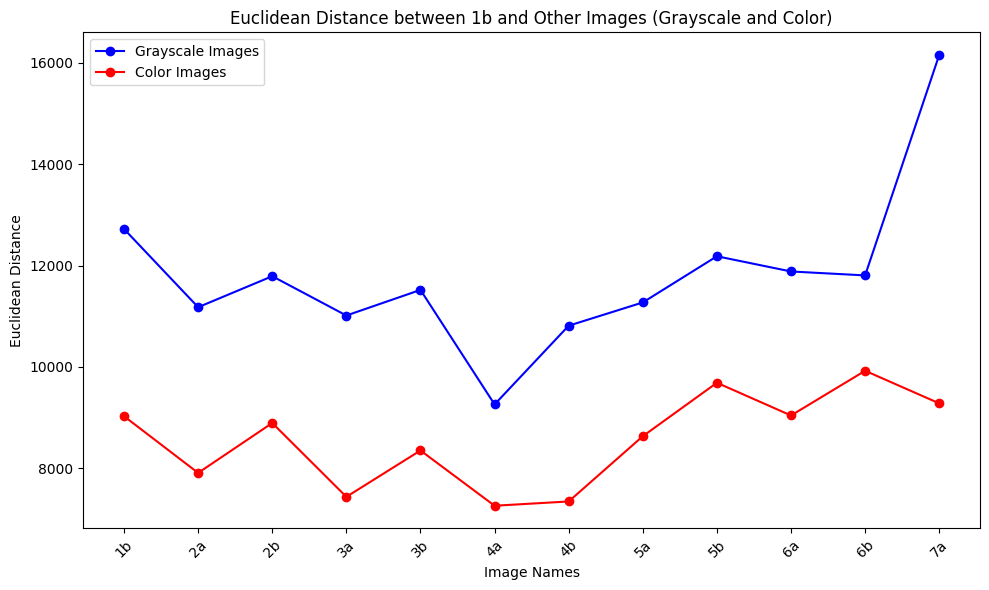

In [11]:

plt.figure(figsize=(10, 6))
plt.plot(image_names, euclidean_distances_list_gray, marker='o', linestyle='-', color='b', label='Grayscale Images')
plt.plot(image_names, euclidean_distances_list_clr, marker='o', linestyle='-', color='r', label='Color Images')

plt.title('Euclidean Distance between 1b and Other Images (Grayscale and Color)')
plt.xlabel('Image Names')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


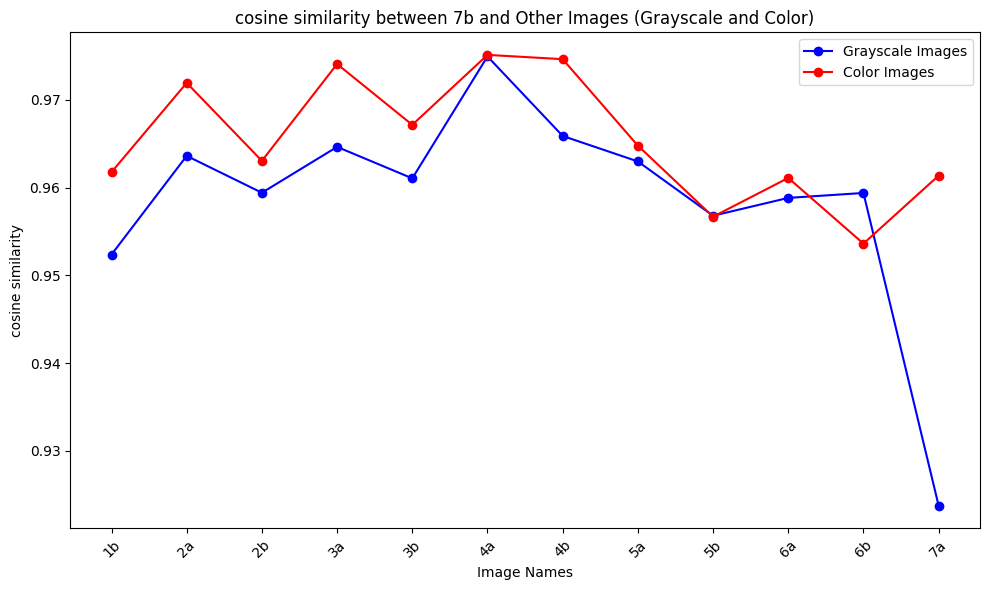

In [12]:

plt.figure(figsize=(10, 6))

plt.plot(image_names, cosine_similarities_list_gray, marker='o', linestyle='-', color='b', label='Grayscale Images')

plt.plot(image_names, cosine_similarities_list_clr, marker='o', linestyle='-', color='r', label='Color Images')

plt.title('cosine similarity between 7b and Other Images (Grayscale and Color)')
plt.xlabel('Image Names')
plt.ylabel('cosine similarity')
plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


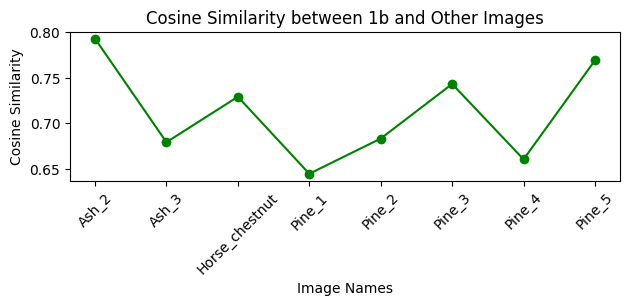

In [28]:
plt.subplot(2, 1, 2)
plt.plot(image_names, cosine_similarities_list_dif , marker='o', linestyle='-', color='g')
plt.title('Cosine Similarity between 1b and Other Images')
plt.xlabel('Image Names')
plt.ylabel('Cosine Similarity')
plt.xticks(rotation=45)
plt.tight_layout()